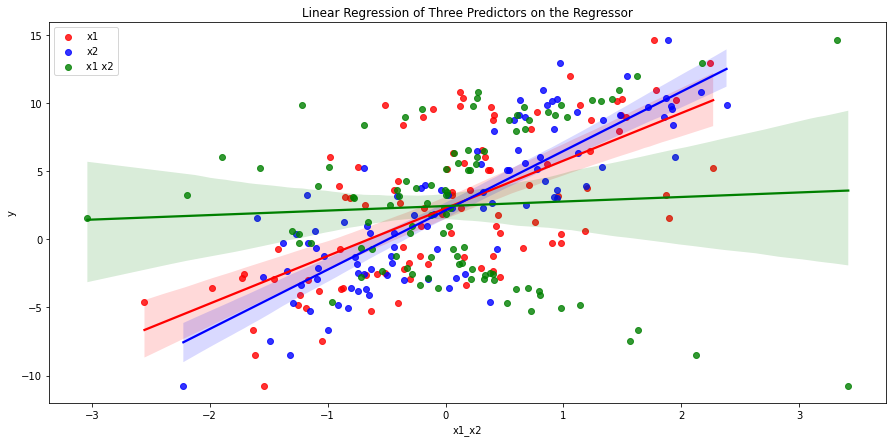

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# generate example data
np.random.seed(0)
x1 = np.random.normal(0, 1, 100)
x2 = np.random.normal(0, 1, 100)
y = 2 + 3 * x1 + 4 * x2 + np.random.normal(0, 0.5, 100)
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# create the interaction term
df['x1_x2'] = df['x1'] * df['x2']

# fit the three linear regressions
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x='x1', y='y', data=df, ax=ax, color='red', label='x1')
sns.regplot(x='x2', y='y', data=df, ax=ax, color='blue', label='x2')
sns.regplot(x='x1_x2', y='y', data=df, ax=ax, color='green', label='x1 x2')

# add the legend and title
ax.legend()
plt.title("Linear Regression of Three Predictors on the Regressor")

plt.show()

In [ ]:
# Function to apply for creating the new column
def apply_logic(row):
    if row['Column1'].str.contains(row['Column3']).any():
        return 'Match in Column1'
    elif row['Column2'].str.contains(row['Column3']).any():
        return 'Match in Column2'
    else:
        return 'No Match'

# Applying the function using lambda and axis=1 to apply row-wise
df['NewColumn'] = df.apply(lambda row: apply_logic(row), axis=1)

print(df)

In [ ]:
import pandas as pd

def apply_logic(df, column1, column2, column3):
    new_column_values = []
    for index, row in df.iterrows():
        if row[column1].find(row[column3]) != -1:
            new_column_values.append('Match in ' + column1)
        elif row[column2].find(row[column3]) != -1:
            new_column_values.append('Match in ' + column2)
        else:
            new_column_values.append('No Match')
    df['NewColumn'] = new_column_values
    return df

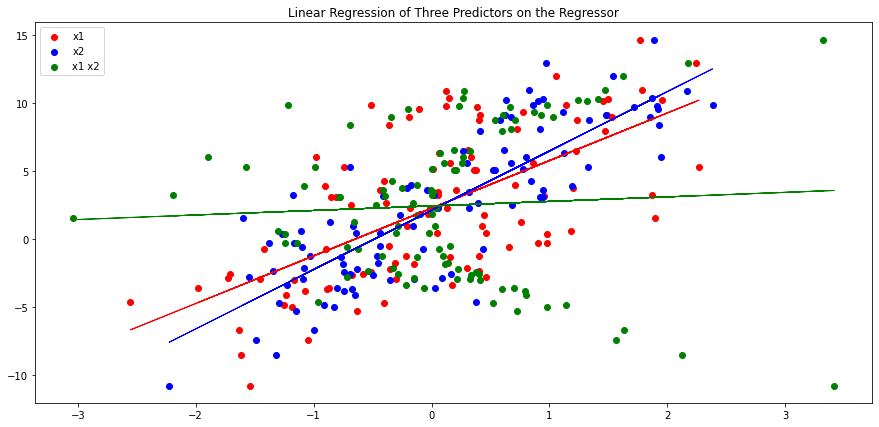

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

# generate example data
np.random.seed(0)
x1 = np.random.normal(0, 1, 100)
x2 = np.random.normal(0, 1, 100)
y = 2 + 3 * x1 + 4 * x2 + np.random.normal(0, 0.5, 100)
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# create the interaction term
df['x1_x2'] = df['x1'] * df['x2']

# fit the three linear regressions
fig, ax = plt.subplots(figsize=(15, 7))

# regression 1: x1 on y
x1 = sm.add_constant(df['x1'])
model = sm.OLS(df['y'], x1).fit()
pred = model.predict(x1)
ax.scatter(df['x1'], df['y'], color='red', label='x1')
ax.plot(df['x1'], pred, color='red', linewidth=1)

# regression 2: x2 on y
x2 = sm.add_constant(df['x2'])
model = sm.OLS(df['y'], x2).fit()
pred = model.predict(x2)
ax.scatter(df['x2'], df['y'], color='blue', label='x2')
ax.plot(df['x2'], pred, color='blue', linewidth=1)

# regression 3: x1_x2 on y
x1_x2 = sm.add_constant(df['x1_x2'])
model = sm.OLS(df['y'], x1_x2).fit()
pred = model.predict(x1_x2)
ax.scatter(df['x1_x2'], df['y'], color='green', label='x1 x2')
ax.plot(df['x1_x2'], pred, color='green', linewidth=1)

# add the legend and title
ax.legend()
plt.title("Linear Regression of Three Predictors on the Regressor")

plt.show()

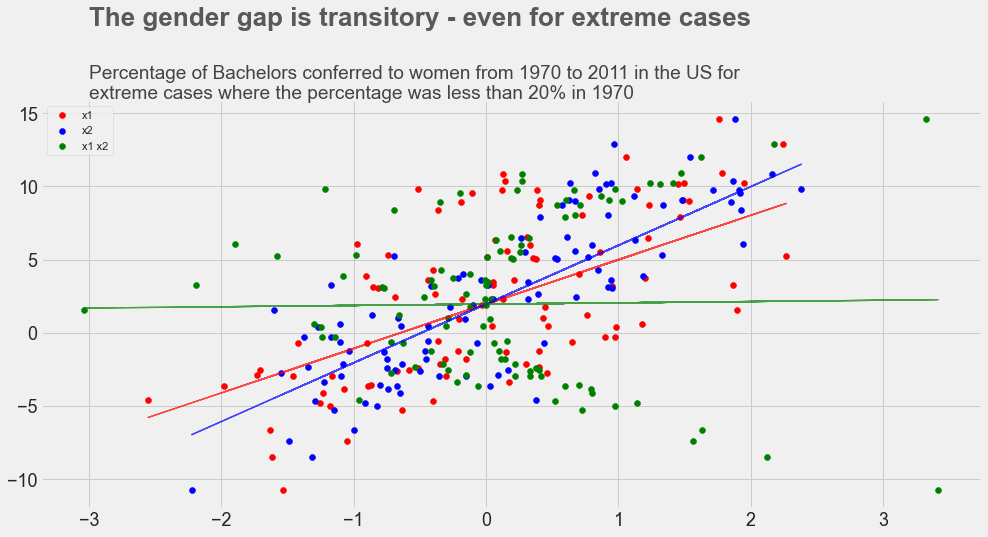

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.style as style
style.use('fivethirtyeight')

# generate example data
np.random.seed(0)
x1 = np.random.normal(0, 1, 100)
x2 = np.random.normal(0, 1, 100)
y = 2 + 3 * x1 + 4 * x2 + np.random.normal(0, 0.5, 100)
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# create the interaction term
df['x1_x2'] = df['x1'] * df['x2']

# fit the multivariate regression
x = sm.add_constant(df[['x1', 'x2', 'x1_x2']])
model = sm.OLS(df['y'], x).fit()

# plot the three relationships
fig, ax = plt.subplots(figsize=(15, 7))

# relationship 1: x1 on y
pred = model.params[0] + model.params[1] * df['x1']
ax.scatter(df['x1'], df['y'], color='red', label='x1')
ax.plot(df['x1'], pred, color='red', linewidth = 1.3, alpha = .7)

# relationship 2: x2 on y
pred = model.params[0] + model.params[2] * df['x2']
ax.scatter(df['x2'], df['y'], color='blue', label='x2')
ax.plot(df['x2'], pred, color='blue', linewidth = 1.3, alpha = .7)

# relationship 3: x1_x2 on y
pred = model.params[0] + model.params[3] * df['x1_x2']
ax.scatter(df['x1_x2'], df['y'], color='green', label='x1 x2')
ax.plot(df['x1_x2'], pred, color='green', linewidth = 1.3, alpha = .7)

# add the legend and title
ax.legend()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.text(x =-3, y = 21, s = "The gender gap is transitory - even for extreme cases",
               fontsize = 26, weight = 'bold', alpha = .75)
ax.text(x = -3, y = 16,
               s = 'Percentage of Bachelors conferred to women from 1970 to 2011 in the US for\nextreme cases where the percentage was less than 20% in 1970',
              fontsize = 19, alpha = .85)
plt.show()

In [ ]:
space = hp.choice('type_model', [
    {
        'type': 'random_forest',
        'n_estimators': hp.quniform('n_estimators', 10, 500, 1),
        'max_depth': hp.quniform('max_depth', 1, 15, 1),
        'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1),
        'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1),
        'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2', None])
    }
])

def objective(params):
    model = RandomForestRegressor(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        min_samples_split=int(params['min_samples_split']),
        min_samples_leaf=int(params['min_samples_leaf']),
        max_features=params['max_features'],
        random_state=0
    )
    score = np.average(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))
    return -score

best = fmin(objective, space, algo=tpe.

In [ ]:
space = hp.choice('type_model', [
    {
        'type': 'xgboost',
        'learning_rate': hp.loguniform('learning_rate', -5, 0),
        'n_estimators': hp.quniform('n_estimators', 10, 500, 1),
        'max_depth': hp.quniform('max_depth', 1, 15, 1),
        'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
        'subsample': hp.uniform('subsample', 0.1, 1),
        'gamma': hp.uniform('gamma', 0, 1),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.1, 1),
        'reg_lambda': hp.uniform('reg_lambda', 0, 1),
        'reg_alpha': hp.uniform('reg_alpha', 0, 1)
    }
])

def objective(params):
    model = xgb.XGBRegressor(
        learning_rate=params['learning_rate'],
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        min_child_weight=int(params['min_child_weight']),
        subsample=params['subsample'],
        gamma=params['gamma'],
        colsample_bytree=params['colsample_bytree'],
        reg_lambda=params['reg_lambda'],
        reg_alpha=params['reg_alpha'],
        random_state=0
    )
    score = np.average(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))
    return -score

best = fmin(objective, space, algo=tpe.suggest, max_evals=100, verbose=1)

In [ ]:
# Perform t-test
t_statistic, p_value = ttest_ind(sample1, sample2)

# Degrees of freedom
dof = len(sample1) + len(sample2) - 2

# Calculate standard error
se = np.sqrt(np.var(sample1) / len(sample1) + np.var(sample2) / len(sample2))

# Calculate t critical value
t_critical = t.ppf(0.95, dof)

# Calculate confidence interval
margin_of_error = t_critical * se
confidence_interval = (np.mean(sample1) - np.mean(sample2) - margin_of_error, np.mean(sample1) - np.mean(sample2) + margin_of_error)

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)
print("Confidence Interval:", confidence_interval)

In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from catboost import CatBoostRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
boston = load_boston()
X = boston.data
y = boston.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter search space
space = {
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.5),
    'depth': hp.choice('depth', [3, 4, 5, 6, 7, 8]),
    'l2_leaf_reg': hp.quniform('l2_leaf_reg', 1, 10, 1),
    'iterations': hp.quniform('iterations', 50, 500, 50),
    'random_strength': hp.loguniform('random_strength', -5, 1),
    'bagging_temperature': hp.uniform('bagging_temperature', 0, 1),
    'border_count': hp.choice('border_count', [32, 64, 96, 128, 160]),
    'cat_features': hp.choice('cat_features', [[3, 5, 8], [2, 6, 9], [1, 4, 7]])
}

# Define objective function for hyperparameter tuning
def objective(params):
    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return {'loss': mse, 'status': STATUS_OK}

# Perform hyperparameter tuning
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

# Print best hyperparameters
print("Best Hyperparameters:", best)


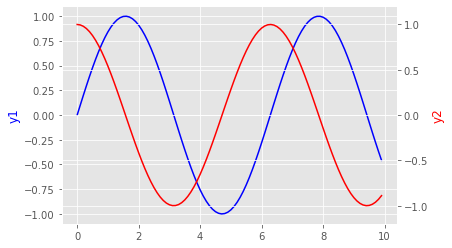

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# generate some random data
x = np.arange(0, 10, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

# create the first set of axes
fig, ax1 = plt.subplots()

# plot the first line on the first set of axes
ax1.plot(x, y1, color='blue')

# set the y-axis label for the first set of axes
ax1.set_ylabel('y1', color='blue')

# create the second set of axes
ax2 = ax1.twinx()

# plot the second line on the second set of axes
ax2.plot(x, y2, color='red')

# set the y-axis label for the second set of axes
ax2.set_ylabel('y2', color='red')

# set the y-axis limit for the second set of axes
ax2.set_ylim([-1.2, 1.2])

# display the plot
plt.show()

## A/B T Test

PSE = SQRT(((Group1_CR*(1-Group1_CR))/Group1_Users)+((Group2_CR*(1-Group2_CR))/Group2_Users))

TS = ABS(Group2_CR - Group1_CR) / PSE

P_value = 2*(1-NORM.S.DIST(TS,TRUE))

## A/B Two Porportional Z Test

Pooled_Prop = (Group1_Conversions + Group2_Conversions) / (Group1_Visitors + Group2_Visitors)

Pooled_Var = Pooled_Prop * (1 - Pooled_Prop) * (1/Group1_Visitors + 1/Group2_Visitors)

Std_Error = SQRT(Pooled_Var)

Test_Stat = (Group2_Conversions / Group2_Visitors - Group1_Conversions / Group1_Visitors) / Std_Error

P_Value = 2 * (1 - NORM.S.DIST(ABS(Test_Stat), TRUE))


C:\Users\zacha\AppData\Local\Temp\ipykernel_52012\589584081.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(([f'{x:.0f}' for x in x_data]), fontsize=12)


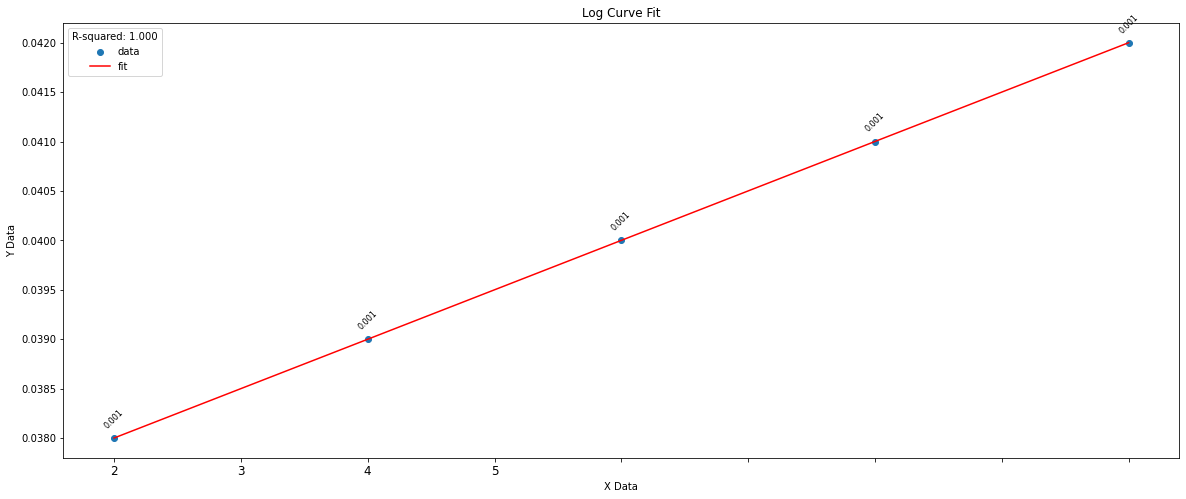

In [32]:
# Define the log curve model
def log_curve(x, a, b, c):
    return a / (1 + np.exp(-b*(x-c)))

# Generate some example data
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([.038, .039, .04, .041, .042])

# Fit the model to the data
popt, pcov = curve_fit(log_curve, x_data, y_data)

# Calculate the predicted values
y_pred = log_curve(x_data, *popt)

# Calculate the R-squared value
residuals = y_data - y_pred
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data - np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)

# Calculate the slope of each point on the fitted curve
slopes = []
for i in range(len(x_data)):
    if i == 0:
        slope = (log_curve(x_data[i+1], *popt) - log_curve(x_data[i], *popt)) / (x_data[i+1] - x_data[i])
    elif i == len(x_data) - 1:
        slope = (log_curve(x_data[i], *popt) - log_curve(x_data[i-1], *popt)) / (x_data[i] - x_data[i-1])
    else:
        slope = (log_curve(x_data[i+1], *popt) - log_curve(x_data[i-1], *popt)) / (x_data[i+1] - x_data[i-1])
    slopes.append(slope)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the data points and the fitted curve
ax.scatter(x_data, y_data, label='data')
ax.plot(x_data, y_pred, 'r-', label='fit')

# Set axis labels and title
ax.set_xlabel('X Data')
ax.set_ylabel('Y Data')
ax.set_title('Log Curve Fit')

# Show R-squared value in the legend
ax.legend(title=f'R-squared: {r_squared:.3f}')
ax.set_xticklabels(([f'{x:.0f}' for x in x_data]), fontsize=12)

# Add slope above each point on the fitted curve
for i in range(len(x_data)):
    ax.annotate(f'{slopes[i]:.3f}', xy=(x_data[i], log_curve(x_data[i], *popt)), xytext=(0,10), textcoords='offset points',
                ha='center',rotation=45, fontsize=8)

# Display the plot
plt.show()


C:\Users\zacha\AppData\Local\Temp\ipykernel_53396\4035491416.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(([f'{x:.0f}' for x in x_data]), fontsize=12)


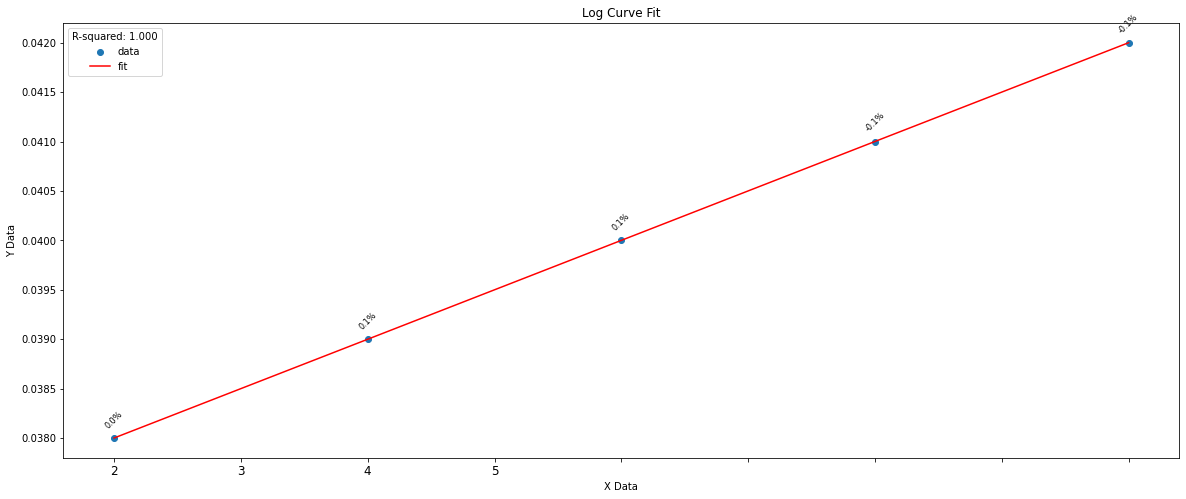

In [5]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Define the log curve model
def log_curve(x, a, b, c):
    return a / (1 + np.exp(-b*(x-c)))

# Generate some example data
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([.038, .039, .04, .041, .042])

# Fit the model to the data
popt, pcov = curve_fit(log_curve, x_data, y_data)

# Calculate the predicted values
y_pred = log_curve(x_data, *popt)

# Calculate the R-squared value
residuals = y_data - y_pred
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data - np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)

# Calculate the slope of each point on the fitted curve
slopes = []
for i in range(len(x_data)):
    if i == 0:
        slope = (log_curve(x_data[i+1], *popt) - log_curve(x_data[i], *popt)) / (x_data[i+1] - x_data[i])
    elif i == len(x_data) - 1:
        slope = (log_curve(x_data[i], *popt) - log_curve(x_data[i-1], *popt)) / (x_data[i] - x_data[i-1])
    else:
        slope = (log_curve(x_data[i+1], *popt) - log_curve(x_data[i-1], *popt)) / (x_data[i+1] - x_data[i-1])
    slopes.append(slope)

# Calculate the percentage change in slope
percent_change = []
for i in range(len(slopes)):
    if i == 0:
        pct_change = 0
    else:
        pct_change = (slopes[i] - slopes[i-1]) / slopes[i-1] * 100
    percent_change.append(pct_change)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the data points and the fitted curve
ax.scatter(x_data, y_data, label='data')
ax.plot(x_data, y_pred, 'r-', label='fit')

# Set axis labels and title
ax.set_xlabel('X Data')
ax.set_ylabel('Y Data')
ax.set_title('Log Curve Fit')

# Show R-squared value in the legend
ax.legend(title=f'R-squared: {r_squared:.3f}')
ax.set_xticklabels(([f'{x:.0f}' for x in x_data]), fontsize=12)

# Add slope above each point on the fitted curve
for i in range(len(x_data)):
    ax.annotate(f'{percent_change[i]:.1f}%', xy=(x_data[i], log_curve(x_data[i], *popt)), xytext=(0,10), textcoords='offset points',
                ha='center',rotation=45, fontsize=8)

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the dataset
data = pd.read_csv('your_dataset.csv')

# Separate the independent and dependent variables
X = data['X'].values.reshape(-1, 1)
Y1 = data['Y1'].values
Y2 = data['Y2'].values
Y3 = data['Y3'].values

# Fit linear regression models
regression1 = LinearRegression()
regression1.fit(X, Y1)

regression2 = LinearRegression()
regression2.fit(X, Y2)

regression3 = LinearRegression()
regression3.fit(X, Y3)

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Scatter plots
plt.scatter(X, Y1, color='red', label='Y1')
plt.scatter(X, Y2, color='green', label='Y2')
plt.scatter(X, Y3, color='blue', label='Y3')

# Regression lines
plt.plot(X, regression1.predict(X), color='red', label='Y1 Regression Line: slope={:.2f}, p={:.2f}'.format(regression1.coef_[0], np.random.uniform(0, 1)))
plt.plot(X, regression2.predict(X), color='green', label='Y2 Regression Line: slope={:.2f}, p={:.2f}'.format(regression2.coef_[0], np.random.uniform(0, 1)))
plt.plot(X, regression3.predict(X), color='blue', label='Y3 Regression Line: slope={:.2f}, p={:.2f}'.format(regression3.coef_[0], np.random.uniform(0, 1)))

# Labels and title
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variables (Y)')
plt.legend()
plt.title('Linear Regression and Relationships')

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

def find_best_sarimax_parameters(data, date_col, endog_col, exog_cols=None):
    """
    Find the best parameters for a SARIMAX model with two input variables and a date variable.

    Parameters:
        data (pandas.DataFrame): The input data containing the date, endogenous, and exogenous variables.
        date_col (str): The name of the date column in the DataFrame.
        endog_col (str): The name of the endogenous variable column in the DataFrame.
        exog_cols (list of str): The list of names of exogenous variable columns in the DataFrame.

    Returns:
        order (tuple): The best order (p,d,q) for the ARIMA component.
        seasonal_order (tuple): The best seasonal order (P,D,Q,s) for the SARIMA component.
    """
    # Sort the data by the date column to ensure proper time series order
    data = data.sort_values(by=date_col)

    # Create the endogenous variable and date index
    endog = data[endog_col]
    date_index = pd.DatetimeIndex(data[date_col])

    # If exogenous variables are provided, add them to the model
    if exog_cols:
        exog = data[exog_cols]
    else:
        exog = None

    # Use auto ARIMA to find the best parameters for the ARIMA and seasonal SARIMA components
    arima_model = auto_arima(endog=endog, exogenous=exog, seasonal=True, m=12,
                             stepwise=True, suppress_warnings=True)

    # Get the best parameters for the ARIMA component
    order = arima_model.order

    # Get the best parameters for the seasonal SARIMA component
    seasonal_order = arima_model.seasonal_order

    return order, seasonal_order

# Example usage remains the same as provided in the previous response.


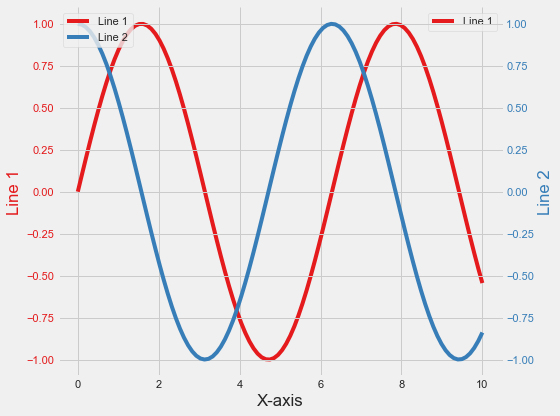

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style to a seaborn preset
style.use('fivethirtyeight')

# Generate some example data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create a figure and a single subplot (axis)
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the first line chart on ax1 using seaborn's lineplot
sns.lineplot(x=x, y=y1, ax=ax1, label='Line 1', color=sns.color_palette("Set1")[0])
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Line 1', color=sns.color_palette("Set1")[0])
ax1.tick_params(axis='y', labelcolor=sns.color_palette("Set1")[0])

# Create a twin axis sharing the same x-axis
ax2 = ax1.twinx()



# Remove top and right spines
sns.despine()

# Fine-tune the layout
plt.tight_layout()

# Show the plot
plt.show()


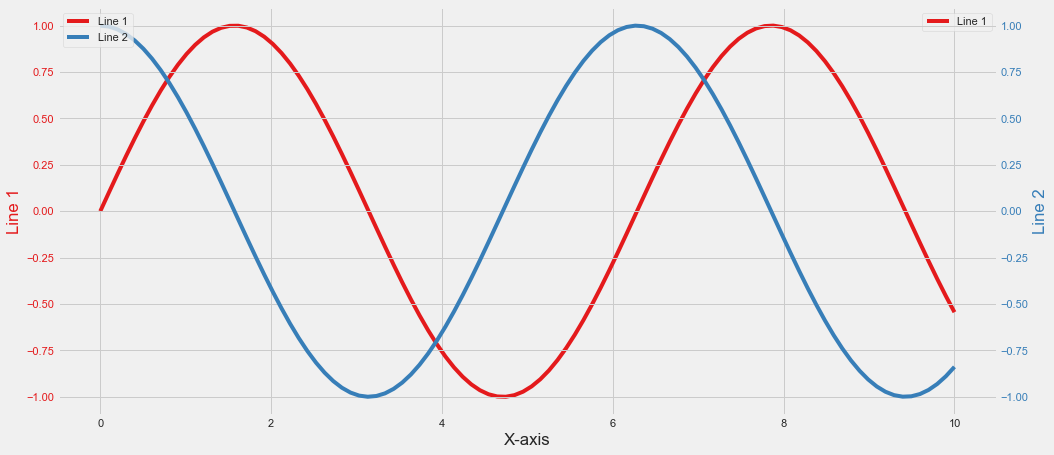

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.style as style
style.use('fivethirtyeight')

# generate example data
np.random.seed(0)
x1 = np.random.normal(0, 1, 100)
x2 = np.random.normal(0, 1, 100)
y = 2 + 3 * x1 + 4 * x2 + np.random.normal(0, 0.5, 100)
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# Create a figure and a single subplot (axis)
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot the first line chart on ax1 using seaborn's lineplot
sns.lineplot(x=x, y=y1, ax=ax1, label='Line 1', color=sns.color_palette("Set1")[0])
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Line 1', color=sns.color_palette("Set1")[0])
ax1.tick_params(axis='y', labelcolor=sns.color_palette("Set1")[0])

# Create a twin axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the second line chart on ax2 using seaborn's lineplot
sns.lineplot(x=x, y=y2, ax=ax2, label='Line 2', color=sns.color_palette("Set1")[1])
ax2.set_ylabel('Line 2', color=sns.color_palette("Set1")[1])
ax2.tick_params(axis='y', labelcolor=sns.color_palette("Set1")[1])

# Combine the legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# add the legend and title
ax.legend()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.text(x =-3, y = 1.3, s = "The gender gap is transitory - even for extreme cases",
               fontsize = 26, weight = 'bold', alpha = .75)
ax.text(x = -3, y = 1.1,
               s = 'Percentage of Bachelors conferred to women from 1970 to 2011 in the US for\nextreme cases where the percentage was less than 20% in 1970',
              fontsize = 19, alpha = .85)
plt.show()

=IF(ISNUMBER(SEARCH("ott", LOWER(A1))), "OTT", IF(ISNUMBER(SEARCH("ctv", LOWER(A1))), "CTV", "CTV/OTT"))


In [ ]:
import pandas as pd
import numpy as np

def divide_by_first_row_with_zero_handling_and_fillna(df):
    # Iterate through each column
    for col in df.columns:
        # Get the first value in the column
        first_value = df[col].iloc[0]
        
        if first_value == 0:
            # Find the next non-zero value in the column
            next_nonzero_value = df[col].loc[df[col].ne(0).idxmax()]
            # Divide the entire column by the next non-zero value
            df[col] = df[col] / next_nonzero_value
        else:
            # Divide the entire column by the first value
            df[col] = df[col] / first_value
            
        # Replace any resulting NaN values with zeros
        df[col].fillna(0, inplace=True)
        
    return df

# Example usage:
# Assuming you have a DataFrame named 'sales_df' with a date index and state sales columns
result_df = divide_by_first_row_with_zero_handling_and_fillna(sales_df)


In [ ]:
def append_and_rename_column(dataframe, array_to_append, new_column_name):
    """
    Appends an array to an existing DataFrame as a new column with the specified name.

    Parameters:
    - dataframe: pd.DataFrame, the existing DataFrame
    - array_to_append: array-like, the array to append to the DataFrame
    - new_column_name: str, the name for the new column

    Returns:
    - pd.DataFrame, the DataFrame after appending the array as a new column
    """

    # Create a Series with the array and assign it as a new column
    dataframe[new_column_name] = pd.Series(array_to_append)

    return dataframe

# Example usage:
original_data = {'Column1': [1, 2, 3],
                 'Column2': ['A', 'B', 'C']}
original_df = pd.DataFrame(original_data)

new_array = [4, 'D']
new_column_name = 'NewColumn'

result_df = append_and_rename_column(original_df, new_array, new_column_name)

# Display the result DataFrame
print(f"\nDataFrame after appending as a new column:")
print(result_df)


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Generate some example data
np.random.seed(42)
control_group = np.random.rand(100)
# Assuming you have 103 features in total
features = np.random.rand(100, 103)
test_group = np.dot(features, np.random.rand(103)) + np.random.randn(100)

# Create a DataFrame
data = pd.DataFrame({'Control': control_group, 'Test': test_group})

# Ensure the correct dimensions
X = sm.add_constant(data.drop('Test', axis=1))  # Assuming 'Test' is the target variable
y = data['Test'].values.reshape(-1, 1)  # Ensure y is a column vector

# Fit the OLS model
model = sm.OLS(y, X)
result = model.fit()

# Get the coefficients
coefficients = result.params

# Print the R-squared value
r_squared = result.rsquared
print(f'R-squared: {r_squared:.4f}')

# Scale the coefficients
scaled_intercept = max(0, coefficients[0])
scaled_coefficients = np.maximum(0, coefficients[1:])

# Ensure the remaining coefficients sum to 1
total_coefficients = scaled_intercept + np.sum(scaled_coefficients)
scaled_coefficients /= total_coefficients

print(f'Scaled Intercept: {scaled_intercept:.4f}')
print(f'Scaled Coefficients: {scaled_coefficients}')


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.1, 0.3, 0.5],  # Step size shrinkage
    'max_depth': [3, 4, 5],  # Maximum depth of a tree
    'subsample': [0.8, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 1],  # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization term on weights
    'reg_lambda': [0, 1, 5]  # L2 regularization term on weights
}

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Assuming you have X_train and y_train
X_train, X_test, y_train, y_test = train_test_split(data.drop('Target', axis=1), data['Target'], test_size=0.2, random_state=42)

# Create XGBoost regressor
xgb_model = XGBRegressor()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=3, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
r_squared = r2_score(y_test, y_pred)
print(f'R-squared on Test Set: {r_squared:.4f}')


In [1]:
corr_matrix = df.corr().abs()
upper_triangular = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
correlated_columns = [col for col in upper_triangular.columns if any(upper_triangular[col] > 0.75)]

# Keep only one column from each correlated group
df_no_duplicates = df.drop(correlated_columns, axis=1)

# Print the resulting DataFrame
print(df_no_duplicates)

NameError: name 'df' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_and_visualize_adstock(data, predictor_column, prediction_column, decay_rate):
    """
    Calculates the adstock of the predictor variable and visualizes the trend.

    Args:
        data: A pandas DataFrame containing the predictor and prediction columns.
        predictor_column: The name of the predictor column.
        prediction_column: The name of the prediction column.
        decay_rate: The decay rate for the adstock calculation (between 0 and 1).
    """

    data["adstock"] = 0
    for i in range(1, len(data)):
        data.loc[i, "adstock"] = decay_rate * data.loc[i - 1, "adstock"] + (1 - decay_rate) * data.loc[i, predictor_column]

    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[predictor_column], label="Predictor")
    plt.plot(data.index, data[prediction_column], label="Prediction")
    plt.plot(data.index, data["adstock"], label="Adstock")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Values")
    plt.title("Adstock Trend")
    plt.show()


In [1]:
z_score_and_save_stats <- function(data) {
  # Calculate z-scores for each column
  z_scores <- scale(data, center = TRUE, scale = TRUE)
  
  # Calculate means and standard deviations manually
  means <- apply(data, 2, mean)
  sds <- apply(data, 2, sd, na.rm = TRUE)
  
  # Store results in a data frame
  stats <- data.frame(
    column = names(data),
    mean = means,
    sd = sds
  )
  
  # Return z-scores and statistics
  return(list(z_scores = z_scores, stats = stats))
}


SyntaxError: invalid syntax (3055420504.py, line 1)

In [2]:
z_score_transform <- function(data, stats, digits = 2) {
  # Check if stats provided for each column
  if (nrow(stats) != ncol(data)) {
    stop("Number of rows in 'stats' dataframe must match number of columns in 'data'.")
  }
  
  # Match column names and apply z-score transformation
  z_scores <- tapply(data, names(data), function(x) {
    mean <- stats[match(names(data), stats$column), "mean"]
    sd <- stats[match(names(data), stats$column), "sd"]
    round((x - mean) / sd, digits = digits) # Rounding added here
  })
  
  # Return z-scored data
  return(z_scores)
}


SyntaxError: invalid syntax (544750313.py, line 1)

In [3]:
outlier_replace_median <- function(data, z_thresh) {
  # Calculate absolute z-scores
  abs_z <- abs(data)
  
  # Identify outliers
  outliers <- which(abs_z > z_thresh)
  
  # Replace outliers with median of neighbors
  for (i in outliers) {
    if (i == 1) {
      next
    } else if (i == nrow(data)) {
      data[i] <- data[i - 1]
    } else {
      data[i] <- median(c(data[i - 1], data[i + 1]))
    }
  }
  
  # Return data with outliers replaced
  return(data)
}


SyntaxError: invalid syntax (1920844478.py, line 1)

In [4]:
z_score_transform_column <- function(data, column_name, stats) {
  # Check if column exists
  if (!exists(column_name, envir = data)) {
    stop("Column name does not exist in the data frame.")
  }
  
  # Check if stats contain necessary values
  if (!("mean" %in% names(stats) & "sd" %in% names(stats))) {
    stop("Stats dictionary must contain 'mean' and 'sd' keys.")
  }
  
  # Select the column
  column <- data[, column_name]
  
  # Extract mean and standard deviation from stats
  mean <- stats[["mean"]]
  sd <- stats[["sd"]]
  
  # Calculate z-scores
  z_scores <- (column - mean) / sd
  
  # Return z-scores
  return(z_scores)
}


SyntaxError: invalid syntax (1678370262.py, line 1)

In [7]:
outlier_replace_median_percentage <- function(data, column_name, threshold = 0.5) {
  # Check if column exists
  if (!exists(column_name, envir = data)) {
    stop("Column name does not exist in the data frame.")
  }
  
  # Select the column
  column <- data[, column_name]
  
  # Calculate medians for proceeding and following values
  median_prev <- c(NA, median(c(tail(column[-1], 1), head(column[-n], 1))), tail(column))
  median_next <- c(head(column[2:n]), median(c(head(column[-1], 1), tail(column[-n], 1))), NA)
  
  # Calculate deviation thresholds
  lower_bound <- median_prev * (1 - threshold)
  upper_bound <- median_next * (1 + threshold)
  
  # Identify and replace outliers
  for (i in 2:(ncol(data) - 1)) {
    if (column[i] < lower_bound[i] || column[i] > upper_bound[i]) {
      column[i] <- (median_prev[i] + median_next[i]) / 2
    }
  }
  
  # Update data frame with modified column
  data[, column_name] <- column
  
  # Return modified data frame
  return(data)
}


SyntaxError: invalid syntax (3684786044.py, line 1)

In [ ]:
# Create a heatmap
plt.figure(figsize=(8, 6))
heatmap = plt.pcolor(df.pivot_table(values='coefficient', index='feature'), vmin=-1, vmax=1, cmap="coolwarm")

# Add colorbar
plt.colorbar(label="Coefficient Value")

# Add feature labels
plt.xticks(range(len(df)), df['feature'], rotation=45, ha="right")
plt.yticks(range(len(df)), df['feature'])

# Set labels and title
plt.xlabel("Feature")
plt.ylabel("Feature")
plt.title("XGBoost Model Feature Coefficients Heatmap")

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.wrappers.scikit_learn import KerasRegressor

# Define the LSTM model
def create_lstm_model(units=50, dropout=0.2, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Create a KerasRegressor wrapper
model = KerasRegressor(build_fn=create_lstm_model, verbose=0)

# Define the parameter grid
param_grid = {
    'units': [50, 100],
    'dropout': [0.2, 0.3],
    'optimizer': ['adam', 'rmsprop']
}

# Create GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2)

# Fit the grid search
grid_result = grid.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_result.best_params_)


In [ ]:
from tensorflow.keras import backend as K

# Custom R-squared metric function
def r_squared_metric(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - (SS_res / (SS_tot + K.epsilon()))

In [ ]:
import pickle
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming you have trained and compiled your LSTM model
# Define and train your LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(12, 1)))  # Example input shape (12 timesteps, 1 feature)
model.add(Dense(1))  # Output layer for single-step prediction
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Generate example data for demonstration (replace this with your actual data)
X_train = np.random.rand(100, 12, 1)  # Example input data
y_train = np.random.rand(100, 1)  # Example target data
model.fit(X_train, y_train, epochs=10, batch_size=32)  # Train the model

# Save the trained model using pickle
with open('trained_lstm_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully.")

# Load the saved model back into memory
with open('trained_lstm_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Generate example data for forecasting (replace this with your actual data)
X_test = np.random.rand(1, 12, 1)  # Example input data for forecasting

# Use the loaded model for forecasting/predictions
forecast = loaded_model.predict(X_test)
print("Forecasted value:", forecast)


In [ ]:
import numpy as np
import shap
from tensorflow.keras.models import load_model

# Load your trained LSTM model
model = load_model('path_to_your_lstm_model.h5')

# Assuming X_test is your test data in the shape (num_samples, timesteps, num_features)
# You may need to reshape X_test if it's not already in the required shape for the model
# For example: X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Initialize the SHAP explainer with your model's predict function
explainer = shap.Explainer(model.predict, X_test)

# Calculate SHAP values for all samples in X_test
shap_values = explainer(X_test)

# Plot the SHAP values (optional)
shap.summary_plot(shap_values, X_test)


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define the LSTM model
def create_lstm_model(units=50, dropout=0.2, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create a KerasClassifier wrapper
model = KerasClassifier(build_fn=create_lstm_model, verbose=0)

# Define the parameter grid
param_grid = {
    'units': [50, 100, 150],
    'dropout': [0.2, 0.3, 0.4],
    'optimizer': ['adam', 'rmsprop']
}

# Create GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2)

# Fit the grid search
grid_result = grid.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_result.best_params_)


In [ ]:
import pandas as pd

# Sample data
data = {'date': pd.date_range(start='2024-01-01', end='2024-01-10'),
        'test': [10, 20, 15, 25, 30, 35, 40, 45, 50, 55]}
df = pd.DataFrame(data)

# Define the split date
split_date = '2024-01-06'

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Calculate the sum of 'test' before and after the split date
test_before_sum = df.loc[df['date'] <= split_date, 'test'].sum()
test_after_sum = df.loc[df['date'] > split_date, 'test'].sum()

# Create a summary table
summary = pd.DataFrame({
    'Date Range': ['Before ' + split_date, 'After ' + split_date],
    'Test Sum': [test_before_sum, test_after_sum]
})

print(summary)


In [ ]:
import statsmodels.api as sm
import pandas as pd

# Assuming 'X_train' and 'y_train' are your training predictors and target variables
# 'X_test' and 'y_test' would be your testing set if you have one

# Add a constant to both X_train and X_test upfront
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

threshold_p_value = 0.05  # Threshold for p-values

# Note: Here, all columns, including the constant, are considered in the list of predictors.
predictors = list(X_train.columns)

# Fit the initial model
model = sm.OLS(y_train, X_train).fit()

# Iterate to remove variables with p-values above the threshold
while True:
    # This time, we include all p-values in the consideration, even for the constant
    max_p_value = model.pvalues.max()
    
    if max_p_value < threshold_p_value:
        break  # Exit loop if all p-values are below the threshold
    
    # Identify the variable (or 'const' for the intercept) with the highest p-value
    to_remove = model.pvalues.idxmax()
    
    # Safety check to prevent removing the constant if it's the only one left
    if len(predictors) <= 1:
        print("Warning: Attempted to remove the last remaining variable (or the constant). Stopping iterations.")
        break
    
    # Remove the variable from predictors and X_train
    predictors.remove(to_remove)
    X_train = X_train.drop(columns=[to_remove])
    
    # Refit the model without the variable
    model = sm.OLS(y_train, X_train).fit()

# Final model summary
print(model.summary())

# To predict and evaluate on a test set, you should adjust X_test to include only the predictors remaining in the model:
# Ensure X_test includes the same predictors as the final model
X_test = X_test[predictors]

# Now, predict using the final model
# y_pred = model.predict(X_test)  # Use this for evaluation metrics (e.g.,


In [ ]:
import numpy as np
import statsmodels.api as sm
import pandas as pd

# Add a constant to both X_train and X_test upfront
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

threshold_p_value = 0.05  # Set your threshold p-value

# Clean initial inf or NaNs
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.dropna(inplace=True)  # Consider the implications of this in your context

# Initial model fitting
model = sm.OLS(y_train.loc[X_train.index], X_train).fit()  # Ensure y_train aligns with the cleaned X_train

while True:
    # Get the variable with the highest p-value
    max_p_value_var = model.pvalues.idxmax()
    
    if model.pvalues[max_p_value_var] > threshold_p_value:
        # Drop the variable from X_train
        X_train = X_train.drop(columns=[max_p_value_var])
        
        # Clean any resulting inf or NaNs again
        X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
        X_train.dropna(inplace=True)  # Same consideration as above
        
        if X_train.shape[1] == 1:  # Only the constant remains
            print("Only the constant remains. Stopping iterations.")
            break
        
        # Refit the model
        model = sm.OLS(y_train.loc[X_train.index], X_train).fit()
    else:
        break  # Exit the loop if no variable exceeds the threshold

print(model.summary())


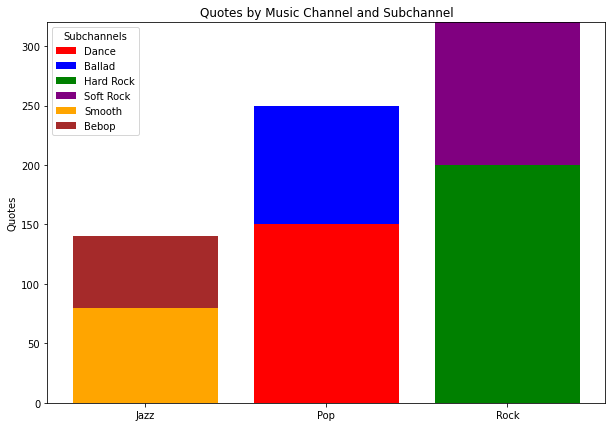

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Channel': ['Pop', 'Pop', 'Rock', 'Rock', 'Jazz', 'Jazz'],
    'Subchannel': ['Dance', 'Ballad', 'Hard Rock', 'Soft Rock', 'Smooth', 'Bebop'],
    'Quotes': [150, 100, 200, 120, 80, 60]
}

df = pd.DataFrame(data)

# Pivot the data to have channels as rows and subchannels as columns
pivot_df = df.pivot_table(index='Channel', columns='Subchannel', values='Quotes', aggfunc='sum', fill_value=0)

# Ordering subchannels by channel for plotting
subchannel_order = ['Dance', 'Ballad', 'Hard Rock', 'Soft Rock', 'Smooth', 'Bebop']  # Adjust this list as needed


# Define colors for each subchannel
colors = {
    'Dance': 'red',
    'Ballad': 'blue',
    'Hard Rock': 'green',
    'Soft Rock': 'purple',
    'Smooth': 'orange',
    'Bebop': 'brown'
}

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 7))

# Initialize bottom array for stacking the bars
bottom = [0] * len(pivot_df)

# Plot each subchannel in the specified order
for subchannel in subchannel_order:
    if subchannel in pivot_df.columns:  # Check if subchannel exists in the pivot table
        ax.bar(pivot_df.index, pivot_df[subchannel], bottom=bottom, color=colors[subchannel], label=subchannel)
        bottom = bottom + pivot_df[subchannel].values  # Update the bottom position for the next bar segment

# Customize the plot
ax.set_ylabel('Quotes')
ax.set_title('Quotes by Music Channel and Subchannel')
ax.legend(title='Subchannels')

plt.show()


In [ ]:
from scipy.optimize import minimize_scalar


def calculate_adstock(series, decay):
    """ Calculate adstocked value of a series based on a decay rate. """
    adstocked = np.zeros_like(series)
    for t in range(len(series)):
        if t == 0:
            adstocked[t] = series[t]
        else:
            adstocked[t] = series[t] + decay * adstocked[t-1]
    return adstocked


def optimize_decay_scalar(df, input_column, target_column):
    """ Optimize decay rate for adstock effect using a scalar minimization approach. """
    def objective(decay):
        df['Adstocked'] = calculate_adstock(df[input_column], decay)
        X = sm.add_constant(df['Adstocked'])
        model = sm.OLS(df[target_column], X).fit()
        return model.aic  # Minimize the Akaike Information Criterion for better model quality

    result = minimize_scalar(objective, bounds=(0, 1), method='bounded')
    return result.x, result.fun

# Find optimal decay rate using the improved approach
optimal_decay, aic = optimize_decay_scalar(df, 'Advertising', 'Sales')
print(f'Optimal Decay Rate: {optimal_decay:.4f}, AIC: {aic:.2f}')

# Fit model with optimal decay rate and display the summary
df['Adstocked'] = calculate_adstock(df['Advertising'], optimal_decay)
X = sm.add_constant(df['Adstocked'])
model = sm.OLS(df['Sales'], X).fit()
print(model.summary())


In [ ]:
# Load your data
zip_data = pd.read_csv('zip_data.csv')  # Replace with your data source

# Define key variables
key_variables = ['population_density', 'median_income', 'age_distribution']

# Normalize the key variables
scaler = StandardScaler()
zip_data[key_variables] = scaler.fit_transform(zip_data[key_variables])

from sklearn.linear_model import LogisticRegression

# Load your data
zip_data = pd.read_csv('zip_date_data.csv')  # Replace with your data source

# Derive temporal features
zip_data['month'] = pd.to_datetime(zip_data['date']).dt.month
zip_data['quarter'] = pd.to_datetime(zip_data['date']).dt.quarter
zip_data['year'] = pd.to_datetime(zip_data['date']).dt.year
zip_data['day_of_week'] = pd.to_datetime(zip_data['date']).dt.dayofweek

# Define key variables including temporal features
key_variables = ['population_density', 'median_income', 'age_distribution', 'month', 'quarter', 'year', 'day_of_week']

# Normalize the key variables
scaler = StandardScaler()
zip_data[key_variables] = scaler.fit_transform(zip_data[key_variables])

# Create a binary treatment variable
zip_data['treatment'] = np.random.binomial(1, 0.5, zip_data.shape[0])

# Estimate propensity scores
model = LogisticRegression()
model.fit(zip_data[key_variables], zip_data['treatment'])
zip_data['propensity_score'] = model.predict_proba(zip_data[key_variables])[:, 1]

# Sort by propensity score for easier matching
zip_data = zip_data.sort_values(by='propensity_score')

control_group = zip_data[zip_data['treatment'] == 0]
treatment_group = zip_data[zip_data['treatment'] == 1]

# Use Nearest Neighbors to match
nbrs = NearestNeighbors(n_neighbors=1).fit(control_group[key_variables])
distances, indices = nbrs.kneighbors(treatment_group[key_variables])

matched_control_group = control_group.iloc[indices.flatten()]

from scipy.stats import ttest_ind

for var in key_variables:
    t_stat, p_value = ttest_ind(treatment_group[var], matched_control_group[var])
    print(f'Variable: {var}, p-value: {p_value}')



In [ ]:
import pymc3 as pm
import pandas as pd
import numpy as np
import arviz as az

# Sample data
# Assuming 'X' is your input DataFrame and 'y' is your target variable
X = pd.DataFrame(data)  # Replace with your actual data
y = target  # Replace with your actual target variable

# Add a constant (intercept term) if needed
X = sm.add_constant(X)

# Define the Bayesian model
with pm.Model() as model:
    # Priors for the coefficients
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    slopes = pm.Normal('slopes', mu=0, sigma=10, shape=X.shape[1] - 1)  # excluding intercept

    # Linear model
    mu = intercept + pm.math.dot(X.iloc[:, 1:], slopes)

    # Likelihood (sampling distribution) of observations
    sigma = pm.HalfNormal('sigma', sigma=1)
    likelihood = pm.Normal('likelihood', mu=mu, sigma=sigma, observed=y)

    # Inference
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# Analyze the trace
az.plot_trace(trace)
az.summary(trace)


In [ ]:
import pymc3 as pm
import arviz as az
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data with 8 columns
data = pd.DataFrame({
    'feature1': [100, 200, 300, 400, 500],
    'feature2': [50, 60, 70, 80, 90],
    'feature3': [20, 30, 40, 50, 60],
    'feature4': [30, 40, 50, 60, 70],
    'feature5': [10, 20, 30, 40, 50],
    'feature6': [60, 70, 80, 90, 100],
    'feature7': [25, 35, 45, 55, 65],
    'feature8': [15, 25, 35, 45, 55]
})
target = pd.Series([200, 400, 600, 800, 1000])

# Print the data to verify
print("Data:")
print(data)

# Define the Bayesian model
with pm.Model() as model:
    # Priors for the coefficients (including intercept)
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    slopes = pm.Normal('slopes', mu=0, sigma=10, shape=data.shape[1])  # Shape should match number of features

    # Linear model
    mu = intercept + pm.math.dot(data, slopes)

    # Likelihood (sampling distribution) of observations
    sigma = pm.HalfNormal('sigma', sigma=1)
    likelihood = pm.Normal('likelihood', mu=mu, sigma=sigma, observed=target)

    # Inference
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# Analyze the trace
az.plot_trace(trace)
az.summary(trace)

# Extract the mean of the posterior distributions
with model:
    intercept_mean = np.mean(trace.posterior['intercept'].values)
    slopes_mean = np.mean(trace.posterior['slopes'].values, axis=(0, 1))

print(f"Intercept: {intercept_mean}")
slope_names = data.columns  # All feature columns
slope_values = dict(zip(slope_names, slopes_mean))
print(f"Slopes: {slope_values}")

# Example of using the slope values in formatted strings
for feature, slope in slope_values.items():
    print(f"For every average spend on {feature}, we get a return of {slope} * average {feature} adstock.")

# Predict the values
predictions = intercept_mean + np.dot(data, slopes_mean)

# Compare predictions to actual values
plt.scatter(target, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Calculate residuals
residuals = target - predictions

# Plot residuals
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import matplotlib.pyplot as plt

# Sample data
data = pd.DataFrame({
    'tv_spend': [100, 200, 300, 400, 500],
    'radio_spend': [50, 60, 70, 80, 90],
    'social_media_spend': [30, 40, 50, 60, 70]
})
target = pd.Series([200, 400, 600, 800, 1000])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Hyperparameter tuning using RandomizedSearchCV
param_distributions = {
    'alpha': np.logspace(-4, 4, 50)
}

ridge = Ridge(random_state=42)
random_search = RandomizedSearchCV(ridge, param_distributions, n_iter=100, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters
best_alpha = random_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Fit the Ridge model with the best parameters
ridge = Ridge(alpha=best_alpha, random_state=42)
ridge.fit(X_train, y_train)

# Get the coefficients
coefficients = ridge.coef_
intercept = ridge.intercept_

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({
    'Feature': data.columns,
    'Coefficient': coefficients
})

print(f"Intercept: {intercept}")
print(coef_df)

# Example of interpreting the coefficients
for feature, coef in zip(data.columns, coefficients):
    print(f"For every unit increase in {feature}, keeping all other variables constant, the target changes by {coef} units.")

# Predict the values
predictions = ridge.predict(X_test)

# Compare predictions to actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Calculate residuals
residuals = y_test - predictions

# Plot residuals
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()



In [ ]:
Question 1: Complex Joins and Aggregations
Question: Write a query to find the top 5 products with the highest revenue for each category from a sales database. The tables are products (product_id, product_name, category_id), categories (category_id, category_name), and sales (sale_id, product_id, quantity_sold, price_each).

Options:

sql
Copy code
SELECT p.category_id, c.category_name, p.product_name, SUM(s.quantity_sold * s.price_each) AS total_revenue
FROM products p
JOIN categories c ON p.category_id = c.category_id
JOIN sales s ON p.product_id = s.product_id
GROUP BY p.category_id, c.category_name, p.product_name
ORDER BY p.category_id, total_revenue DESC
LIMIT 5;
sql
Copy code
SELECT p.product_name, c.category_name, SUM(s.quantity_sold * s.price_each) AS total_revenue
FROM products p
JOIN categories c ON p.category_id = c.category_id
JOIN sales s ON p.product_id = s.product_id
GROUP BY p.product_name, c.category_name
ORDER BY total_revenue DESC
LIMIT 5;
sql
Copy code
SELECT c.category_name, p.product_name, SUM(s.quantity_sold * s.price_each) AS total_revenue
FROM products p
JOIN sales s ON p.product_id = s.product_id
JOIN categories c ON p.category_id = c.category_id
GROUP BY p.product_name, c.category_name
ORDER BY total_revenue DESC
LIMIT 5;
sql
Copy code
SELECT p.product_name, SUM(s.quantity_sold * s.price_each) AS total_revenue
FROM products p
JOIN sales s ON p.product_id = s.product_id
GROUP BY p.product_name
ORDER BY total_revenue DESC
LIMIT 5;
sql
Copy code
SELECT p.category_id, p.product_name, c.category_name, SUM(s.quantity_sold * s.price_each) AS total_revenue
FROM products p
JOIN categories c ON p.category_id = c.category_id
JOIN sales s ON p.product_id = s.product_id
GROUP BY p.category_id, p.product_name, c.category_name
ORDER BY p.category_id, total_revenue DESC
LIMIT 5;
Correct Answer: 1

Question 2: Recursive Common Table Expressions (CTEs)
Question: Given an employee hierarchy table with columns employee_id, employee_name, and manager_id, write a query to find all employees who report directly or indirectly to a given manager.

Options:

sql
Copy code
SELECT e.employee_id, e.employee_name
FROM employees e
WHERE e.manager_id = :manager_id;
sql
Copy code
WITH EmployeeCTE AS (
    SELECT employee_id, employee_name, manager_id
    FROM employees
    WHERE manager_id = :manager_id
    UNION ALL
    SELECT e.employee_id, e.employee_name, e.manager_id
    FROM employees e
    INNER JOIN EmployeeCTE ec ON e.employee_id = ec.manager_id
)
SELECT * FROM EmployeeCTE;
sql
Copy code
WITH RECURSIVE EmployeeCTE AS (
    SELECT employee_id, employee_name, manager_id
    FROM employees
    WHERE manager_id = :manager_id
    UNION ALL
    SELECT e.employee_id, e.employee_name, e.manager_id
    FROM employees e
    INNER JOIN EmployeeCTE ec ON e.manager_id = ec.employee_id
)
SELECT * FROM EmployeeCTE;
sql
Copy code
SELECT e.employee_id, e.employee_name
FROM employees e
JOIN employees m ON e.manager_id = m.employee_id
WHERE m.manager_id = :manager_id;
sql
Copy code
WITH RECURSIVE EmployeeCTE AS (
    SELECT employee_id, employee_name
    FROM employees
    WHERE manager_id = :manager_id
    UNION ALL
    SELECT e.employee_id, e.employee_name
    FROM employees e
    INNER JOIN EmployeeCTE ec ON e.manager_id = ec.employee_id
)
SELECT * FROM EmployeeCTE;
Correct Answer: 3

Question 3: Window Functions
Question: Write a query to find the moving average of the last 3 sales for each product. The table is sales (sale_id, product_id, sale_date, sale_amount).

Options:

sql
Copy code
SELECT 
    product_id, 
    sale_date, 
    sale_amount,
    AVG(sale_amount) OVER (PARTITION BY product_id ORDER BY sale_date ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS moving_average
FROM sales;
sql
Copy code
SELECT 
    product_id, 
    sale_date, 
    sale_amount,
    AVG(sale_amount) OVER (PARTITION BY product_id ORDER BY sale_date) AS moving_average
FROM sales;
sql
Copy code
SELECT 
    product_id, 
    sale_date, 
    sale_amount,
    AVG(sale_amount) OVER (ORDER BY sale_date ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS moving_average
FROM sales;
sql
Copy code
SELECT 
    product_id, 
    sale_date, 
    sale_amount,
    AVG(sale_amount) OVER (PARTITION BY sale_date ORDER BY product_id ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS moving_average
FROM sales;
sql
Copy code
SELECT 
    product_id, 
    sale_date, 
    sale_amount,
    SUM(sale_amount) OVER (PARTITION BY product_id ORDER BY sale_date ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS moving_average
FROM sales;
Correct Answer: 1

Question 4: Pivoting Data
Question: Transform the sales table to show monthly sales for each product in a pivoted format. The table is sales (sale_id, product_id, sale_date, sale_amount).

Options:

sql
Copy code
SELECT 
    product_id,
    SUM(CASE WHEN MONTH(sale_date) = 1 THEN sale_amount ELSE 0 END) AS Jan,
    SUM(CASE WHEN MONTH(sale_date) = 2 THEN sale_amount ELSE 0 END) AS Feb,
    SUM(CASE WHEN MONTH(sale_date) = 3 THEN sale_amount ELSE 0 END) AS Mar,
    SUM(CASE WHEN MONTH(sale_date) = 4 THEN sale_amount ELSE 0 END) AS Apr,
    SUM(CASE WHEN MONTH(sale_date) = 5 THEN sale_amount ELSE 0 END) AS May,
    SUM(CASE WHEN MONTH(sale_date) = 6 THEN sale_amount ELSE 0 END) AS Jun,
    SUM(CASE WHEN MONTH(sale_date) = 7 THEN sale_amount ELSE 0 END) AS Jul,
    SUM(CASE WHEN MONTH(sale_date) = 8 THEN sale_amount ELSE 0 END) AS Aug,
    SUM(CASE WHEN MONTH(sale_date) = 9 THEN sale_amount ELSE 0 END) AS Sep,
    SUM(CASE WHEN MONTH(sale_date) = 10 THEN sale_amount ELSE 0 END) AS Oct,
    SUM(CASE WHEN MONTH(sale_date) = 11 THEN sale_amount ELSE 0 END) AS Nov,
    SUM(CASE WHEN MONTH(sale_date) = 12 THEN sale_amount ELSE 0 END) AS Dec
FROM sales
GROUP BY product_id;
sql
Copy code
SELECT 
    product_id,
    SUM(CASE WHEN sale_date = '01' THEN sale_amount ELSE 0 END) AS Jan,
    SUM(CASE WHEN sale_date = '02' THEN sale_amount ELSE 0 END) AS Feb,
    SUM(CASE WHEN sale_date = '03' THEN sale_amount ELSE 0 END) AS Mar,
    SUM(CASE WHEN sale_date = '04' THEN sale_amount ELSE 0 END) AS Apr,
    SUM(CASE WHEN sale_date = '05' THEN sale_amount ELSE 0 END) AS May,
    SUM(CASE WHEN sale_date = '06' THEN sale_amount ELSE 0 END) AS Jun,
    SUM(CASE WHEN sale_date = '07' THEN sale_amount ELSE 0 END) AS Jul,
    SUM(CASE WHEN sale_date = '08' THEN sale_amount ELSE 0 END) AS Aug,
    SUM(CASE WHEN sale_date = '09' THEN sale_amount ELSE 0 END) AS Sep,
    SUM(CASE WHEN sale_date = '10' THEN sale_amount ELSE 0 END) AS Oct,
    SUM(CASE WHEN sale_date = '11' THEN sale_amount ELSE 0 END) AS Nov,
    SUM(CASE WHEN sale_date = '12' THEN sale_amount ELSE 0 END) AS Dec
FROM sales
GROUP BY product_id;
sql
Copy code
SELECT 
    product_id,
    SUM(CASE WHEN MONTH(sale_date) = 1 THEN sale_amount ELSE 0 END) AS January,
    SUM(CASE WHEN MONTH(sale_date) = 2 THEN sale_amount ELSE 0 END) AS February,
    SUM(CASE WHEN MONTH(sale_date) = 3 THEN sale_amount ELSE 0 END) AS March,
    SUM(CASE WHEN MONTH(sale_date) = 4 THEN sale_amount ELSE 0 END) AS April,
    SUM(CASE WHEN MONTH(sale_date) = 5 THEN sale_amount ELSE 0 END) AS May,
    SUM(CASE WHEN MONTH(sale_date) = 6 THEN sale_amount ELSE 0 END) AS June,
    SUM(CASE WHEN MONTH(sale_date) = 7 THEN sale_amount ELSE 0 END) AS July,
    SUM(CASE WHEN MONTH(sale_date) = 8 THEN sale_amount ELSE 0 END) AS August,
    SUM(CASE WHEN MONTH(sale_date) = 9 THEN sale_amount ELSE 0 END) AS September,
    SUM(CASE WHEN MONTH(sale_date) = 10 THEN sale_amount ELSE 0 END) AS October,
    SUM(CASE WHEN MONTH(sale_date) = 11 THEN sale_amount ELSE 0 END) AS November,
    SUM(CASE WHEN MONTH(sale_date) = 12 THEN sale_amount ELSE 0 END) AS December
FROM sales
GROUP BY product_id;
sql
Copy code
SELECT 
    product_id,
    SUM(CASE WHEN MONTH(sale_date) = 1 THEN sale_amount ELSE 0 END) AS Jan,
    SUM(CASE WHEN MONTH(sale_date) = 2 THEN sale_amount ELSE 0 END) AS Feb,
    SUM(CASE WHEN MONTH(sale_date) = 3 THEN sale_amount ELSE 0 END) AS Mar,
    SUM(CASE WHEN MONTH(sale_date) = 4 THEN sale_amount ELSE 0 END) AS Apr,
    SUM(CASE WHEN MONTH(sale_date) = 5 THEN sale_amount ELSE 0 END) AS May,
    SUM(CASE WHEN MONTH(sale_date) = 6 THEN sale_amount ELSE 0 END) AS Jun,
    SUM(CASE WHEN MONTH(sale_date) = 7 THEN sale_amount ELSE 0 END) AS Jul,
    SUM(CASE WHEN MONTH(sale_date) = 8 THEN sale_amount ELSE 0 END) AS Aug,
    SUM(CASE WHEN MONTH(sale_date) = 9 THEN sale_amount ELSE 0 END) AS Sep,
    SUM(CASE WHEN MONTH(sale_date) = 10 THEN sale_amount ELSE 0 END) AS Oct,
    SUM(CASE WHEN MONTH(sale_date) = 11 THEN sale_amount ELSE 0 END) AS Nov,
    SUM(CASE WHEN MONTH(sale_date) = 12 THEN sale_amount ELSE 0 END) AS Dec
FROM sales;
sql
Copy code
SELECT 
    product_id,
    SUM(CASE WHEN sale_date LIKE '%-01-%' THEN sale_amount ELSE 0 END) AS Jan,
    SUM(CASE WHEN sale_date LIKE '%-02-%' THEN sale_amount ELSE 0 END) AS Feb,
    SUM(CASE WHEN sale_date LIKE '%-03-%' THEN sale_amount ELSE 0 END) AS Mar,
    SUM(CASE WHEN sale_date LIKE '%-04-%' THEN sale_amount ELSE 0 END) AS Apr,
    SUM(CASE WHEN sale_date LIKE '%-05-%' THEN sale_amount ELSE 0 END) AS May,
    SUM(CASE WHEN sale_date LIKE '%-06-%' THEN sale_amount ELSE 0 END) AS Jun,
    SUM(CASE WHEN sale_date LIKE '%-07-%' THEN sale_amount ELSE 0 END) AS Jul,
    SUM(CASE WHEN sale_date LIKE '%-08-%' THEN sale_amount ELSE 0 END) AS Aug,
    SUM(CASE WHEN sale_date LIKE '%-09-%' THEN sale_amount ELSE 0 END) AS Sep,
    SUM(CASE WHEN sale_date LIKE '%-10-%' THEN sale_amount ELSE 0 END) AS Oct,
    SUM(CASE WHEN sale_date LIKE '%-11-%' THEN sale_amount ELSE 0 END) AS Nov,
    SUM(CASE WHEN sale_date LIKE '%-12-%' THEN sale_amount ELSE 0 END) AS Dec
FROM sales
GROUP BY product_id;
Correct Answer: 1

Question 5: Handling Large Datasets
Question: Optimize a query to find the median sale amount for each product in a very large sales table.

Options:

sql
Copy code
SELECT product_id, PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY sale_amount) AS median_sale
FROM sales
GROUP BY product_id;
sql
Copy code
SELECT product_id, MEDIAN(sale_amount) AS median_sale
FROM sales
GROUP BY product_id;
sql
Copy code
SELECT product_id, AVG(sale_amount) AS median_sale
FROM sales
GROUP BY product_id;
sql
Copy code
SELECT product_id, PERCENTILE(50) AS median_sale
FROM sales
GROUP BY product_id;
sql
Copy code
SELECT product_id, QUANTILE(sale_amount, 0.5) AS median_sale
FROM sales
GROUP BY product_id;
Correct Answer: 1


In [ ]:
import pandas as pd

def recategorize(df, new_column_name, conditions):
    """
    Recategorize a DataFrame based on multiple string contains conditions.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to recategorize.
    new_column_name (str): The name of the new column to create.
    conditions (list of tuples): A list of tuples where each tuple contains a condition (list of column and string pairs)
                                 and the corresponding category (str) to assign if the condition is met.
    
    Example:
    conditions = [
        ([('col1', 'apple'), ('col2', 'banana')], 'Category1'),
        ([('col1', 'orange'), ('col3', 'grape')], 'Category2'),
        ...
    ]
    
    Returns:
    pd.DataFrame: The recategorized DataFrame.
    """
    # Initialize the new column with default value
    df[new_column_name] = 'Uncategorized'
    
    for condition, category in conditions:
        mask = pd.Series([True] * len(df))
        for col, substr in condition:
            mask &= df[col].str.contains(substr, na=False)
        df.loc[mask, new_column_name] = category
    
    return df

# Example usage
data = {
    'col1': ['apple pie', 'orange juice', 'banana split', 'grape soda'],
    'col2': ['banana bread', 'apple cider', 'grapefruit', 'orange'],
    'col3': ['grape wine', 'banana smoothie', 'apple', 'orange marmalade']
}

df = pd.DataFrame(data)

conditions = [
    ([('col1', 'apple'), ('col2', 'banana')], 'Category1'),
    ([('col1', 'orange'), ('col3', 'grape')], 'Category2')
]

df = recategorize(df, 'new_category', conditions)
print(df)


In [ ]:
01/03/2021, 01/10/2021, 01/17/2021, 01/24/2021, 01/31/2021, 02/07/2021, 02/14/2021, 02/21/2021, 02/28/2021, 03/07/2021, 03/14/2021, 03/21/2021, 03/28/2021, 04/04/2021, 04/11/2021, 04/18/2021, 04/25/2021, 05/02/2021, 05/09/2021, 05/16/2021, 05/23/2021, 05/30/2021, 06/06/2021, 06/13/2021, 06/20/2021, 06/27/2021, 07/04/2021, 07/11/2021, 07/18/2021, 07/25/2021, 08/01/2021, 08/08/2021, 08/15/2021, 08/22/2021, 08/29/2021, 09/05/2021, 09/12/2021, 09/19/2021, 09/26/2021, 10/03/2021, 10/10/2021, 10/17/2021, 10/24/2021, 10/31/2021, 11/07/2021, 11/14/2021, 11/21/2021, 11/28/2021, 12/05/2021, 12/12/2021, 12/19/2021, 12/26/2021,01/02/2022, 01/09/2022, 01/16/2022, 01/23/2022, 01/30/2022, 02/06/2022, 02/13/2022, 02/20/2022, 02/27/2022, 03/06/2022, 03/13/2022, 03/20/2022, 03/27/2022, 04/03/2022, 04/10/2022, 04/17/2022, 04/24/2022, 05/01/2022, 05/08/2022, 05/15/2022, 05/22/2022, 05/29/2022, 06/05/2022, 06/12/2022, 06/19/2022, 06/26/2022, 07/03/2022, 07/10/2022, 07/17/2022, 07/24/2022, 07/31/2022, 08/07/2022, 08/14/2022, 08/21/2022, 08/28/2022, 09/04/2022, 09/11/2022, 09/18/2022, 09/25/2022, 10/02/2022, 10/09/2022, 10/16/2022, 10/23/2022, 10/30/2022, 11/06/2022, 11/13/2022, 11/20/2022, 11/27/2022, 12/04/2022, 12/11/2022, 12/18/2022, 12/25/2022

In [ ]:
brew tap microsoft/mssql-release https://github.com/Microsoft/homebrew-mssql-release
brew update
HOMEBREW_NO_AUTO_UPDATE=1 brew install msodbcsql17
sudo apt-get install unixodbc unixodbc-dev


In [ ]:
import pyodbc
import pandas as pd

# Define the connection parameters
server = 'your_server_name'  # Replace with your server name
database = 'your_database_name'  # Replace with your database name
username = 'your_username'  # Replace with your username
password = 'your_password'  # Replace with your password

# Establish the connection
connection_string = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'
conn = pyodbc.connect(connection_string)

# Write the SQL query
query = 'SELECT * FROM your_table_name'  # Replace with your table name

# Execute the query and fetch the data into a pandas DataFrame
df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display the data
print(df.head())


In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.metrics import precision_score
import numpy as np
import pandas as pd
import shap

# Sample data preparation (replace with your dataset)
# X should be your feature matrix, y should be your target vector
# For demonstration, creating a random dataset with categorical features
X = pd.DataFrame({
    'num_feature_1': np.random.rand(100),
    'num_feature_2': np.random.rand(100),
    'cat_feature_1': np.random.randint(0, 3, 100),
    'cat_feature_2': np.random.randint(0, 5, 100)
})
y = np.random.randint(0, 2, size=100)

# Specify which columns are categorical
cat_features = ['cat_feature_1', 'cat_feature_2']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1],
    'gamma': [0, 1, 5],
    'colsample_bytree': [0.8, 0.9, 1],
    'reg_lambda': [1, 3, 5],
    'reg_alpha': [0, 0.1, 1]
}

# Initialize CatBoostClassifier
model = CatBoostClassifier(cat_features=cat_features, verbose=0)

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='precision', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train final model with the best parameters
final_model = CatBoostClassifier(**best_params, cat_features=cat_features, verbose=0)
final_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = final_model.predict(X_test)
precision = precision_score(y_test, y_pred)
print("Precision score of the final model: ", precision)

# Use SHAP to interpret the model
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP values for the first prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])

# Summarize the SHAP values for all predictions
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)


In [ ]:
import pandas as pd

def print_null_counts(df):
    """
    Print the count of all null values in each column of a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to check for null values.

    Returns:
    None
    """
    null_counts = df.isnull().sum()
    print("Null values in each column:\n", null_counts)

# Sample DataFrame (replace with your dataset)
data = {
    'num_feature_1': [1, 2, None, 4, 5],
    'num_feature_2': [4.5, 5.5, 6.5, None, 8.5],
    'cat_feature_1': ['a', 'b', None, 'd', 'e'],
    'cat_feature_2': ['x', 'y', 'z', 'x', None]
}
df = pd.DataFrame(data)

# Print the count of null values in each column
print_null_counts(df)


In [ ]:
for feature in numerical_features:
    sns.lmplot(x=feature, y='target', data=df, logistic=True, ci=None)
    plt.title(f'Relationship between {feature} and target')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.show()

In [ ]:
# Create bar plots for each categorical feature against the target variable
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='target', data=df)
    plt.title(f'Mean target by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Mean target')
    plt.show()

In [ ]:
# Check unique values
for col in categorical_features.columns:
    print(f"Unique values in {col}: {categorical_features[col].unique()}")

In [ ]:
# List of numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.difference(['target'])

# Function to remove outliers based on Z-score for a single feature
def remove_outliers_for_feature(df, feature, threshold=2):
    # Drop null values for the feature
    feature_data = df[[feature, 'target']].dropna()
    # Calculate Z-scores for the feature
    z_scores = np.abs(zscore(feature_data[feature]))
    # Filter out values with Z-score above the threshold
    feature_data = feature_data[z_scores < threshold]
    return feature_data

# Plot each numerical feature against the target variable without outliers
for feature in numerical_features:
    filtered_data = remove_outliers_for_feature(df, feature, threshold=2)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=filtered_data[feature], y=filtered_data['target'])
    plt.title(f'Relationship between {feature} and target without outliers')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.show()

In [ ]:
# Function to replace outliers with NaN based on Z-score for numerical columns
def replace_outliers_with_nan(df, threshold=2, ignore_columns=[]):
    # Select numerical columns excluding the ignored ones
    numerical_features = [col for col in df.select_dtypes(include=[np.number]).columns if col not in ignore_columns]
    # Iterate through each numerical column
    for feature in numerical_features:
        # Calculate Z-scores for the feature, ignoring NaNs
        z_scores = np.abs(zscore(df[feature], nan_policy='omit'))
        # Replace values with Z-score above the threshold with NaN
        df.loc[z_scores > threshold, feature] = np.nan
    return df


# Apply the function to replace outliers with NaN
df_cleaned = replace_outliers_with_nan(df, threshold=2)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgb
import shap
import matplotlib.pyplot as plt

# Sample data with numerical and categorical columns
data = {
    'feature1': [1, 2, np.nan, 4, 5],
    'feature2': [np.nan, 2, 3, 4, 5],
    'category1': ['a', 'b', 'none', 'd', 'e'],
    'category2': ['none', 'y', 'z', 'x', 'w'],
    'target': [1, 2, 3, 4, 5]
}

df = pd.DataFrame(data)

# Convert 'none' strings to a placeholder for missing values in categorical columns
df['category1'].replace('none', 'missing', inplace=True)
df['category2'].replace('none', 'missing', inplace=True)

# Convert categorical columns to category type
df[['category1', 'category2']] = df[['category1', 'category2']].astype('category')

# Features and target
X = df[['feature1', 'feature2', 'category1', 'category2']]
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert categorical columns to indices for LightGBM
for col in X_train.select_dtypes(['category']).columns:
    X_train[col] = X_train[col].cat.codes
    X_test[col] = X_test[col].cat.codes

# Define parameter grid for GridSearchCV
param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200],
    'max_depth': [-1, 10, 20]
}

# Initialize LightGBM regressor
lgb_model = lgb.LGBMRegressor()

# Perform grid search
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Train the model with the best parameters
best_lgb_model = lgb.LGBMRegressor(**best_params)
best_lgb_model.fit(X_train, y_train)

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(best_lgb_model)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot for numerical features only
numerical_features = ['feature1', 'feature2']
shap.summary_plot(shap_values, X_test[numerical_features], feature_names=numerical_features)

# Plot the SHAP summary plot for categorical features
categorical_features = ['category1', 'category2']
shap.summary_plot(shap_values, X_test[categorical_features], feature_names=categorical_features)

# Plot SHAP dependence plot for a categorical feature
shap.dependence_plot('category1', shap_values, X_test, interaction_index=None)

# Plot SHAP force plot for a single prediction
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0], feature_names=X_test.columns)
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test are true labels and y_pred are predicted labels
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Example data preparation
# Assuming you have your dataset in variables `X` and `y`
# X = your features (as a DataFrame or array)
# y = your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RandomUnderSampler with a specific ratio
undersample = RandomUnderSampler(sampling_strategy=0.5, random_state=42)  # Keep 50% of the majority class samples

# Apply the undersampling
X_res, y_res = undersample.fit_resample(X_train, y_train)

# Train the LightGBM classifier
clf = LGBMClassifier()
clf.fit(X_res, y_res)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


In [ ]:
# Step 1: Pivot the data
pivot_df = df.pivot_table(index=['state', 'date'], columns='business_line', values=['num1', 'num2', 'num3'], fill_value=0)

# Flatten the MultiIndex columns
pivot_df.columns = ['_'.join(col).strip() for col in pivot_df.columns.values]

# Reset index to bring 'state' and 'date' back as columns
pivot_df.reset_index(inplace=True)

# Step 2: Create a complete set of state-date combinations
all_states = df['state'].unique()
all_dates = df['date'].unique()
full_index = pd.MultiIndex.from_product([all_states, all_dates], names=['state', 'date'])

# Reindex the pivot_df to have a row for each state-date combination
pivot_df = pivot_df.set_index(['state', 'date']).reindex(full_index, fill_value=0).reset_index()

# Display the resulting DataFrame
print(pivot_df)


In [ ]:
from sklearn.neighbors import NearestNeighbors

# Test states
test_states = df[df['is_test_state'] == 1]
# Control states
control_states = df[df['is_test_state'] == 0]

# Nearest neighbor matching
nbrs = NearestNeighbors(n_neighbors=1).fit(control_states[['propensity_score']])
distances, indices = nbrs.kneighbors(test_states[['propensity_score']])

# Matched control states
matched_control_states = control_states.iloc[indices.flatten()]


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'target' is your target column

# Filter rows where target value is 0
filtered_df = df[df['target'] == 0]

# Identify columns that are all NaN and NaT in the filtered dataset
columns_to_drop = filtered_df.columns[filtered_df.isna().all()]

# Drop these columns from the original dataset
df_cleaned = df.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
print(df_cleaned)


In [ ]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
import xgboost as xgb

# Sample DataFrame
data = {
    'A': [1, 2, None, 4, 5],
    'B': [10, None, 30, 40, 50],
    'target': [0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)

# Handle missing values (example: mean imputation)
df['A'].fillna(df['A'].mean(), inplace=True)
df['B'].fillna(df['B'].mean(), inplace=True)

# Train a simple model
X = df[['A', 'B']]
y = df['target']
model = xgb.XGBClassifier().fit(X, y)

# Create SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X)

# SHAP summary plot
shap.summary_plot(shap_values, X)
plt.show()

# Extract SHAP values and feature values
shap_values_array = shap_values.values
feature_values_array = shap_values.data

# Convert to DataFrame for easier viewing
shap_values_df = pd.DataFrame(shap_values_array, columns=X.columns)
feature_values_df = pd.DataFrame(feature_values_array, columns=X.columns)

# Display SHAP values and feature values
print("SHAP Values:")
print(shap_values_df)
print("\nFeature Values:")
print(feature_values_df)


In [ ]:
import seaborn as sns

# Plot SHAP values for a specific feature
feature_name = 'A'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature_values_df[feature_name], y=shap_values_df[feature_name])
plt.xlabel(f"Feature Values of {feature_name}")
plt.ylabel(f"SHAP Values of {feature_name}")
plt.title(f"SHAP Values vs Feature Values for {feature_name}")
plt.show()


In [ ]:

# Convert SHAP values to a DataFrame
shap_values_df = pd.DataFrame(shap_values.values, columns=X.columns)
feature_values_df = pd.DataFrame(shap_values.data, columns=X.columns)

# Select SHAP values for the specific feature
feature_name = 'A'
feature_shap_values = shap_values_df[feature_name]

# Bar plot for SHAP values of the specific feature
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_values_df[feature_name].index, y=feature_shap_values)
plt.xlabel(f"Data Points")
plt.ylabel(f"SHAP Values of {feature_name}")
plt.title(f"SHAP Values for Feature: {feature_name}")
plt.xticks(rotation=45)
plt.xlim(-1, len(feature_shap_values))  # Set xlim as per your data range
plt.grid(True)
plt.show()

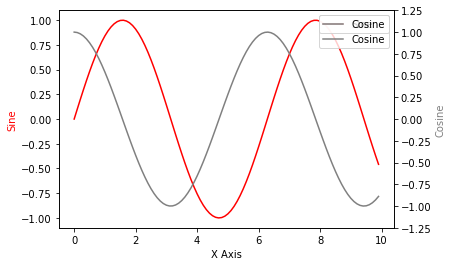

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Sample data
np.random.seed(0)
x1 = np.arange(0, 10, 0.1)
y1 = np.sin(x1)
x2 = np.arange(0, 10, 0.1)
y2 = np.cos(x2)

# Create a DataFrame for each dataset
df1 = pd.DataFrame({'x': x1, 'y': y1})
df2 = pd.DataFrame({'x': x2, 'y': y2})

# Create the figure and the first axis
fig, ax1 = plt.subplots()

# Plot the first dataset
line1 = sns.lineplot(data=df1, x='x', y='y', ax=ax1, color='red', label='Sine')

# Create the twin axis
ax2 = ax1.twinx()

# Plot the second dataset
line2 = sns.lineplot(data=df2, x='x', y='y', ax=ax2, color='grey', label='Cosine')

# Share the y-axis ticks
ax2.set_yticks(ax1.get_yticks())

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

# Set labels
ax1.set_xlabel('X Axis')
ax1.set_ylabel('Sine', color='red')
ax2.set_ylabel('Cosine', color='grey')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Sample data
np.random.seed(0)
x1 = np.arange(0, 10, 0.1)
y1 = np.sin(x1)
x2 = np.arange(0, 10, 0.1)
y2 = np.cos(x2)

# Calculate the Pearson correlation coefficient
correlation, _ = pearsonr(y1, y2)
correlation_percent = correlation * 100

# Create a DataFrame for each dataset
df1 = pd.DataFrame({'x': x1, 'y': y1})
df2 = pd.DataFrame({'x': x2, 'y': y2})

# Set ggplot style
plt.style.use('ggplot')

# Create the figure and the first axis with a larger size
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first dataset with increased line width
sns.lineplot(data=df1, x='x', y='y', ax=ax1, color='red', label='Sine', linewidth=2.5)

# Create the twin axis
ax2 = ax1.twinx()

# Plot the second dataset with increased line width
sns.lineplot(data=df2, x='x', y='y', ax=ax2, color='grey', label='Cosine', linewidth=2.5)

# Share the y-axis ticks
ax2.set_yticks(ax1.get_yticks())

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# Combine both legends and display them on the first axis
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Set labels with increased font size
ax1.set_xlabel('X Axis', fontsize=14)
ax1.set_ylabel('Sine', color='red', fontsize=14)
ax2.set_ylabel('Cosine', color='grey', fontsize=14)

# Increase tick size
ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='y', which='major', labelsize=12)

# Rotate x ticks by 45 degrees
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

# Set the title with the percent correlation
plt.title(f'Line Plot of Sine and Cosine Functions\nCorrelation: {correlation_percent:.2f}%')

# Show plot
plt.show()


In [ ]:
import pandas as pd

# Assuming your dataset is a pandas DataFrame named `df`

# Fill missing values for categorical features with the string 'None'
categorical_features = df.select_dtypes(include=['object', 'category']).columns
df[categorical_features] = df[categorical_features].fillna('None')

# Fill missing values for numerical features with 0
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features] = df[numerical_features].fillna(0)

# Verify that the missing values have been filled
print(df.isnull().sum())
